<a href="https://colab.research.google.com/github/s-mostafa-a/lung-cancer-segmentation/blob/master/using_wolny_package_for_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/circulosmeos/gdown.pl

Cloning into 'gdown.pl'...
remote: Enumerating objects: 92, done.
remote: Total 92 (delta 0), reused 0 (delta 0), pack-reused 92
Unpacking objects: 100% (92/92), done.


In [2]:
!./gdown.pl/gdown.pl https://drive.google.com/file/d/1s3X1zJMGIQVN5V9zD8hcKLlnIz96pH-W

Cannot open cookies file ‘gdown.cookie.temp’: No such file or directory
--2020-07-06 21:42:21--  https://docs.google.com/uc?id=1s3X1zJMGIQVN5V9zD8hcKLlnIz96pH-W&export=download
Resolving docs.google.com (docs.google.com)... 172.217.214.113, 172.217.214.100, 172.217.214.102, ...
Connecting to docs.google.com (docs.google.com)|172.217.214.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘gdown.20200706214221.987876415093528’

     0K                                     52.5M=0s

2020-07-06 21:42:22 (52.5 MB/s) - ‘gdown.20200706214221.987876415093528’ saved [3259]

--2020-07-06 21:42:22--  https://docs.google.com/uc?export=download&confirm=ziEK&id=1s3X1zJMGIQVN5V9zD8hcKLlnIz96pH-W
Resolving docs.google.com (docs.google.com)... 172.217.214.100, 172.217.214.113, 172.217.214.138, ...
Connecting to docs.google.com (docs.google.com)|172.217.214.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Lo

In [3]:
!mv gdown.20* lung.tar
!tar -xf lung.tar
!rm lung.tar

In [4]:
!pip install git+git://github.com/s-mostafa-a/niftidataset.git
!git clone https://github.com/wolny/pytorch-3dunet.git

  Cloning git://github.com/s-mostafa-a/niftidataset.git to /tmp/pip-req-build-coa9xbx8
  Running command git clone -q git://github.com/s-mostafa-a/niftidataset.git /tmp/pip-req-build-coa9xbx8
  Created wheel for niftidataset: filename=niftidataset-0.2.0-cp36-none-any.whl size=11872 sha256=9888e8681587fb990bee82a2a69919c400c977b4d79a3c39f1df46b4279d45f8
  Stored in directory: /tmp/pip-ephem-wheel-cache-szy1htew/wheels/90/80/c0/09c0a7dbe8a2902eeca8ebc007b7cbe2b5a06389d3f71d54f9
Successfully built niftidataset
Cloning into 'pytorch-3dunet'...
remote: Enumerating objects: 346, done.
remote: Counting objects: 100% (346/346), done.
remote: Compressing objects: 100% (202/202), done.
remote: Total 2698 (delta 216), reused 248 (delta 141), pack-reused 2352
Receiving objects: 100% (2698/2698), 296.96 MiB | 46.99 MiB/s, done.
Resolving deltas: 100% (1781/1781), done.


In [5]:
!pip install hdbscan

     |████████████████████████████████| 4.7MB 3.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2307165 sha256=346106fa71b1cca7365f8db5b8f027f8c316c242cd81ba6e8c4ea7ecf7554fcf
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('/content/pytorch-3dunet/'))
if module_path not in sys.path:
    sys.path.append(module_path)
from pytorch3dunet.unet3d.model import UNet3D, ResidualUNet3D
from pytorch3dunet.unet3d.losses import *
from pytorch3dunet.unet3d.metrics import *
from niftidataset import *
from torchvision import transforms as tvt
%matplotlib inline
%load_ext autoreload
%autoreload 2
train_dir = '/content/Task06_Lung/'
patch_sz = 64
tfms = tvt.Compose([RandomCrop3D(patch_sz), ToTensor(), Normalize(mean=[0],std=[1],is_3d=True)])
tds, vds = get_train_and_validation_from_one_directory(source_dir=train_dir+'imagesTr', target_dir=train_dir+'labelsTr', valid_pct=0.2, transform=tfms)
print(len(tds), len(vds))
from fastai import vision as faiv
idb = faiv.ImageDataBunch.create(tds, vds, bs=1, num_workers=1)


51 12


In [ ]:
import torch 
model = UNet3D(in_channels=1, out_channels=1, final_sigmoid=False)
metric = MeanIoU()
metric.__name__ = 'MeanIoU'
learner = faiv.Learner(idb, model, loss_func=DiceLoss(), metrics=[metric], opt_func=torch.optim.Adam)
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


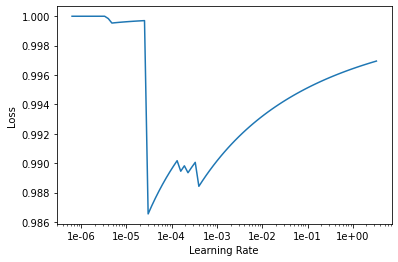

In [ ]:
learner.recorder.plot()

In [ ]:
# model(tds[0][0].view(tds[0][0].size()[0], -1))
# learner.predict(tds[0][0])
learner.fit_one_cycle(10, max_lr=slice(1e-03), pct_start=0.8)

epoch,train_loss,valid_loss,MeanIoU,time
0,0.998508,1.000000,0.000000,09:32
1,0.996173,1.000000,0.000000,09:26
2,0.996809,1.000000,0.000000,09:35
3,0.997406,1.000000,0.000000,09:27
4,0.997791,1.000000,0.000000,09:25


In [ ]:
learner.fit_one_cycle(10, max_lr=slice(1e-03), pct_start=0.8, a)

torch.Size([12, 1, 64, 64, 64])
torch.Size([12, 1, 64, 64, 64])


In [8]:
import torch 
model = UNet3D(in_channels=1, out_channels=1, final_sigmoid=False)
metric = MeanIoU()
metric.__name__ = 'MeanIoU'
learner = faiv.Learner(idb, model, loss_func=nn.CrossEntropyLoss(weight=torch.Tensor([0.01,0.99])), metrics=[metric], opt_func=torch.optim.Adam)
learner.lr_find()



epoch,train_loss,valid_loss,MeanIoU,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


ValueError: ignored

In [5]:
from functools import partial


In [2]:
!export CUDA_LAUNCH_BLOCKING=1

In [3]:
from torch.nn.modules.loss import _WeightedLoss
from torch import Tensor
from torch import nn
class MyOwnCrossEntropyLoss(_WeightedLoss):
    def __init__(self, weight: Tensor = None, size_average=None, ignore_index: int = -100,
                 reduce=None, reduction: str = 'mean') -> None:
        super(MyOwnCrossEntropyLoss, self).__init__(weight, size_average, reduce, reduction)
        self.ignore_index = ignore_index

    def forward(self, input: Tensor, target: Tensor) -> Tensor:
        return F.cross_entropy(input, target.squeeze(0).long(), weight=self.weight,
                               ignore_index=self.ignore_index, reduction=self.reduction)


class MyWeightedCrossEntropyLoss(nn.Module):
    """WeightedCrossEntropyLoss (WCE) as described in https://arxiv.org/pdf/1707.03237.pdf
    """

    def __init__(self, ignore_index=-1):
        super(MyWeightedCrossEntropyLoss, self).__init__()
        self.ignore_index = ignore_index

    def forward(self, input, target):
        weight = self._class_weights(input)
        return F.cross_entropy(input, target.squeeze(0).long(), weight=weight, ignore_index=self.ignore_index)

    @staticmethod
    def _class_weights(input):
        # normalize the input first
        input = F.softmax(input, dim=1)
        flattened = flatten(input)
        nominator = (1. - flattened).sum(-1)
        denominator = flattened.sum(-1)
        class_weights = Variable(nominator / denominator, requires_grad=False)
        return class_weights


import torch 
model = UNet3D(in_channels=1, out_channels=1, final_sigmoid=False)
metric = MeanIoU()
metric.__name__ = 'MeanIoU'
learner = faiv.Learner(idb, model, loss_func=MyWeightedCrossEntropyLoss(), metrics=[metric], opt_func=torch.optim.Adam)
learner.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


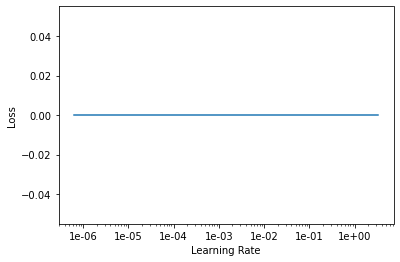

In [4]:
learner.recorder.plot()

In [5]:

import torch 
model = UNet3D(in_channels=1, out_channels=1, final_sigmoid=False)
metric = MeanIoU()
metric.__name__ = 'MeanIoU'
learner = faiv.Learner(idb, model, loss_func=BCEDiceLoss(0.5,0.5), metrics=[metric], opt_func=torch.optim.Adam)
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


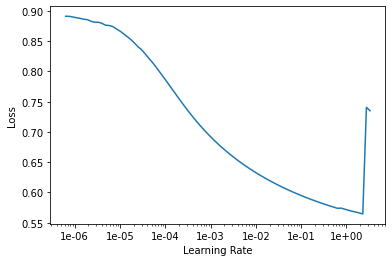

In [6]:
learner.recorder.plot()

In [ ]:
learner.fit_one_cycle(10, max_lr=slice(1e+00), pct_start=0.8)

epoch,train_loss,valid_loss,MeanIoU,time
